# Analyzing a real world data-set with SQL and Python

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this notebook, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://zdd72371:7xdr0-0zsnkzd76p@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB

'Connected: zdd72371@BLUDB'

### Store the dataset in a Table

In [3]:
import pandas as pd

In [4]:
chicago_df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

The **PERSIST** command in SQL "magic" simplifies the process of table creation and writing the data from a pandas dataframe into the table.

In [5]:
%sql PERSIST chicago_df

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_df'

In [6]:
%sql select * from chicago_df limit 5

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Query 1
##### How many rows are in the dataset?

In [7]:
%sql select count(*) as "Total DataSet" from chicago_df

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


Total DataSet
78


### Query 2
##### How many community areas in Chicago have a hardship index greater than 50.0?

In [8]:
%sql select count(*) as "Total" from chicago_df where hardship_index > 50

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


Total
38


### Query 3
##### What is the maximum value of hardship index in this dataset?

In [9]:
%sql select max(hardship_index) as "Max" from chicago_df

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


Max
98.0


### Query 4
##### Which community area which has the highest hardship index?

In [10]:
%sql select community_area_name from chicago_df where hardship_index = (select max(hardship_index) from chicago_df)

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Query 5
##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [11]:
%sql select community_area_name from chicago_df where per_capita_income_ > 60000

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Query 6
##### Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

In [12]:
per_capita_hardship = %sql select per_capita_income_,hardship_index from chicago_df

 * ibm_db_sa://zdd72371:***@dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net:50000/BLUDB
Done.


In [13]:
df = per_capita_hardship.DataFrame()

In [14]:
import seaborn as sns

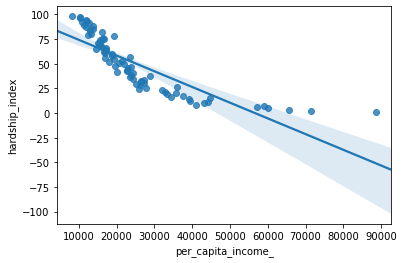

In [15]:
sns.regplot(x='per_capita_income_',y='hardship_index',data=df)

You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.